In [3]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
print(y_train[0])

5


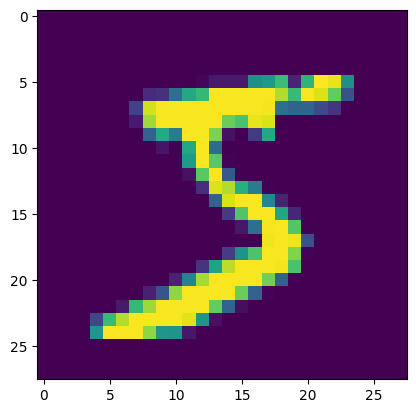

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

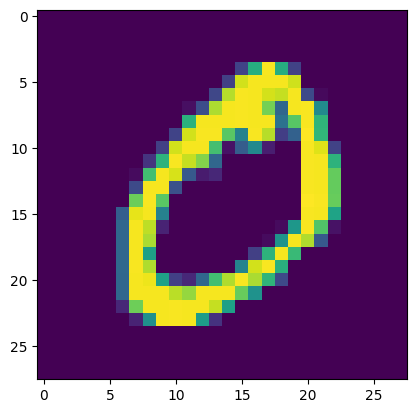

In [10]:
plt.imshow(X_train[1])

In [13]:
X_train = X_train/255
X_test = X_test/255

In [16]:
from tensorflow.keras.layers import Flatten

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'] )

In [19]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8780 - loss: 0.4226 - val_accuracy: 0.9585 - val_loss: 0.1358
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9679 - loss: 0.1061 - val_accuracy: 0.9647 - val_loss: 0.1095
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9778 - loss: 0.0709 - val_accuracy: 0.9768 - val_loss: 0.0799
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9842 - loss: 0.0495 - val_accuracy: 0.9759 - val_loss: 0.0810
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9875 - loss: 0.0376 - val_accuracy: 0.9778 - val_loss: 0.0754
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9896 - loss: 0.0305 - val_accuracy: 0.9782 - val_loss: 0.0751
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9911 - loss: 0.0266 - val_accuracy: 0.9745 - val_loss: 0.1000
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.021

In [20]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9778

In [29]:
y_test[0]

np.uint8(7)

In [28]:
y_pred[0]

array([1.9108373e-10, 1.4174809e-10, 7.6137030e-10, 6.0286531e-08,
       1.8518648e-12, 1.3813462e-12, 2.6341361e-15, 9.9999982e-01,
       1.3860665e-10, 4.7946131e-08], dtype=float32)

In [26]:
import pandas as pd
import numpy as np

y_pred_labels = np.argmax(y_pred, axis=1)

df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_labels
})

print(df)

      Actual  Predicted
0          7          7
1          2          2
2          1          1
3          0          0
4          4          4
...      ...        ...
9995       2          2
9996       3          3
9997       4          4
9998       5          5
9999       6          6

[10000 rows x 2 columns]
